In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import re
import csv
import seaborn as sns
%matplotlib inline

load file

In [2]:
data= pd.read_csv("joined_impressions.csv", encoding="Latin-1")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231524 entries, 0 to 7231523
Data columns (total 5 columns):
frontPageViewId      object
contentPosition      int64
contentId            object
clickedPageViewId    object
IsClicked            int64
dtypes: int64(2), object(3)
memory usage: 275.9+ MB


## distribution of content position 

In [5]:
data.contentPosition.max()+1

127

In [6]:
data.contentPosition.value_counts()

0      386628
1      346482
2      314215
3      285464
4      275835
5      250950
6      242621
7      224510
8      172765
10     167655
9      151458
11     144355
14     144325
15     140049
12     131768
17     125723
18     120446
20     119594
16     118111
19     115823
21     109377
22     108128
13     107649
24     101811
23      97322
25      96274
26      90274
28      88458
27      82253
32      77474
        ...  
97       9971
100      9783
99       9715
98       9400
102      9297
101      8943
105      8381
107      8095
106      8013
104      7707
103      7527
110      6927
109      6832
108      6555
111      5922
112      5882
113      5123
114      4981
115      4886
116      4719
117      4389
118      4258
119      2990
120      2615
121      2363
122      1356
123      1005
124       699
125        34
126         1
Name: contentPosition, Length: 127, dtype: int64

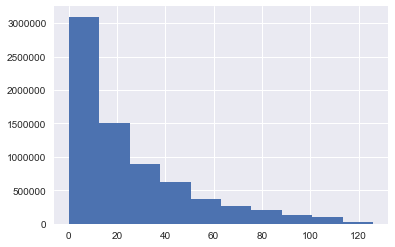

In [7]:
data.contentPosition.hist()

In [8]:
fig=plt.figure(figsize=(16,5), dpi=1600)
alpha_level=0.65

ax1=fig.add_subplot()
aa= data['contentPosition']
plt.hist(aa,color='orange',normed=True,bins=range(1,127), edgecolor='white')
plt.xticks()
plt.xlabel('Content Position')
plt.ylabel('Probility Distribution ')
plt.show()

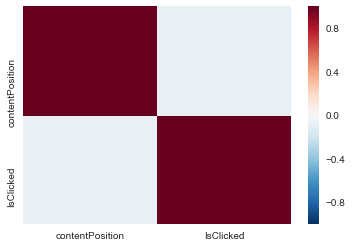

In [9]:
import seaborn as sns
corr = data.corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
print(str(data.describe()))

       contentPosition     IsClicked
count     7.231524e+06  7.231524e+06
mean      2.505893e+01  2.643800e-02
std       2.573257e+01  1.604339e-01
min       0.000000e+00  0.000000e+00
25%       5.000000e+00  0.000000e+00
50%       1.700000e+01  0.000000e+00
75%       3.600000e+01  0.000000e+00
max       1.260000e+02  1.000000e+00


In [11]:
print(data[:10])

                        frontPageViewId  contentPosition contentId  \
0                                   NaN                0     mm3rg   
1                                   NaN                1     lPalk   
2                                   NaN                2     rxO5w   
3                                   NaN                3     x6XzV   
4  00002d7e-c771-476f-8dc1-6f41aee45ecb                4     dAxRJ   
5  00002d7e-c771-476f-8dc1-6f41aee45ecb                5     QeOEW   
6  00002d7e-c771-476f-8dc1-6f41aee45ecb                6     K5PJ4   
7  00002d7e-c771-476f-8dc1-6f41aee45ecb                7     4pxee   
8  00002d7e-c771-476f-8dc1-6f41aee45ecb                8     6Oy9e   
9  00002d7e-c771-476f-8dc1-6f41aee45ecb                9     3A58q   

                      clickedPageViewId  IsClicked  
0                                   NaN          0  
1                                   NaN          0  
2                                   NaN          0  
3                

In [12]:
click=data[data['IsClicked']==1]
click[:10]

,frontPageViewId,contentPosition,contentId,clickedPageViewId,IsClicked
6,00002d7e-c771-476f-8dc1-6f41aee45ecb,6,K5PJ4,fe276cb0-e213-47f2-af05-2ec06cf8b61d,1
22,0000798d-c679-4408-bdb0-ad30b5bae5e2,30,1l8LQ,4302a2ef-6c02-4a37-85ea-d61ae1510df3,1
24,00009654-52fd-4753-bdf0-20373320ad56,1,AKWV5,4aec19d9-1104-4b28-b493-00135740dd4f,1
58,0000ee86-8766-4935-80be-dc79209251d4,0,knxxQ,ffe6052f-da9b-41ea-906c-3ccb081c26a3,1
142,00011556-157a-4099-b5e3-b0ed44833324,45,Oxq6b,1972522c-f1cd-4672-9d51-5b125a6605f0,1
162,00013410-f5ff-4223-8c35-12a09c32ec40,5,K5PJ4,d8e2f6be-d7f0-4005-a82c-84541686b927,1
174,00016b38-e78a-4d22-bf12-8f380be99bff,0,AKWV5,cda34dd9-2b55-4af2-b642-8046b6d9dfc6,1
179,00016e4c-8e5f-4a04-9a2b-4f3d90555ca3,1,Oxzrb,3238e305-272d-49ec-bbfc-de0b445df7ee,1
189,00021ea2-38ad-4d79-b282-5a7b61a5ccdd,2,rxO5w,3c6e21a3-a5c9-4748-bfdd-cd2dfcf2f22e,1
198,00021f6c-6e2e-46cf-9aab-fc09230c9f64,7,lPalk,3234e4ce-3d8b-42cb-bf71-9e05f838b094,1


In [13]:
click.to_csv("click.csv")

In [14]:
click.contentPosition.value_counts()

0      31151
1      15435
3      12218
4      11047
2      10926
5       9664
6       8733
7       8005
8       5692
10      4235
9       4216
14      3886
11      3505
12      3087
17      2770
15      2615
19      2475
18      2338
16      2335
13      2209
20      2153
23      1772
21      1736
25      1655
28      1575
22      1572
26      1543
24      1539
32      1354
27      1287
       ...  
107      102
97        99
101       96
92        92
91        92
112       91
93        90
111       88
96        82
102       82
98        81
105       79
108       79
103       75
106       74
109       71
115       67
104       60
110       60
117       59
114       50
116       49
119       40
113       38
118       34
120       32
121       21
122       16
123        8
124        5
Name: contentPosition, Length: 125, dtype: int64

In [15]:
click.describe()

,contentPosition,IsClicked
count,191187.000000,191187.0
mean,13.996820,1.0
std,19.669716,0.0
min,0.000000,1.0
25%,2.000000,1.0
50%,6.000000,1.0
75%,18.000000,1.0
max,124.000000,1.0


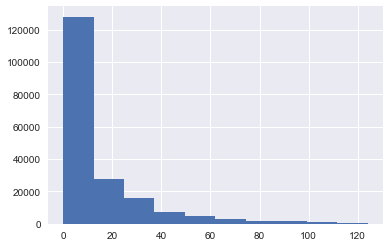

In [16]:
click.contentPosition.hist()

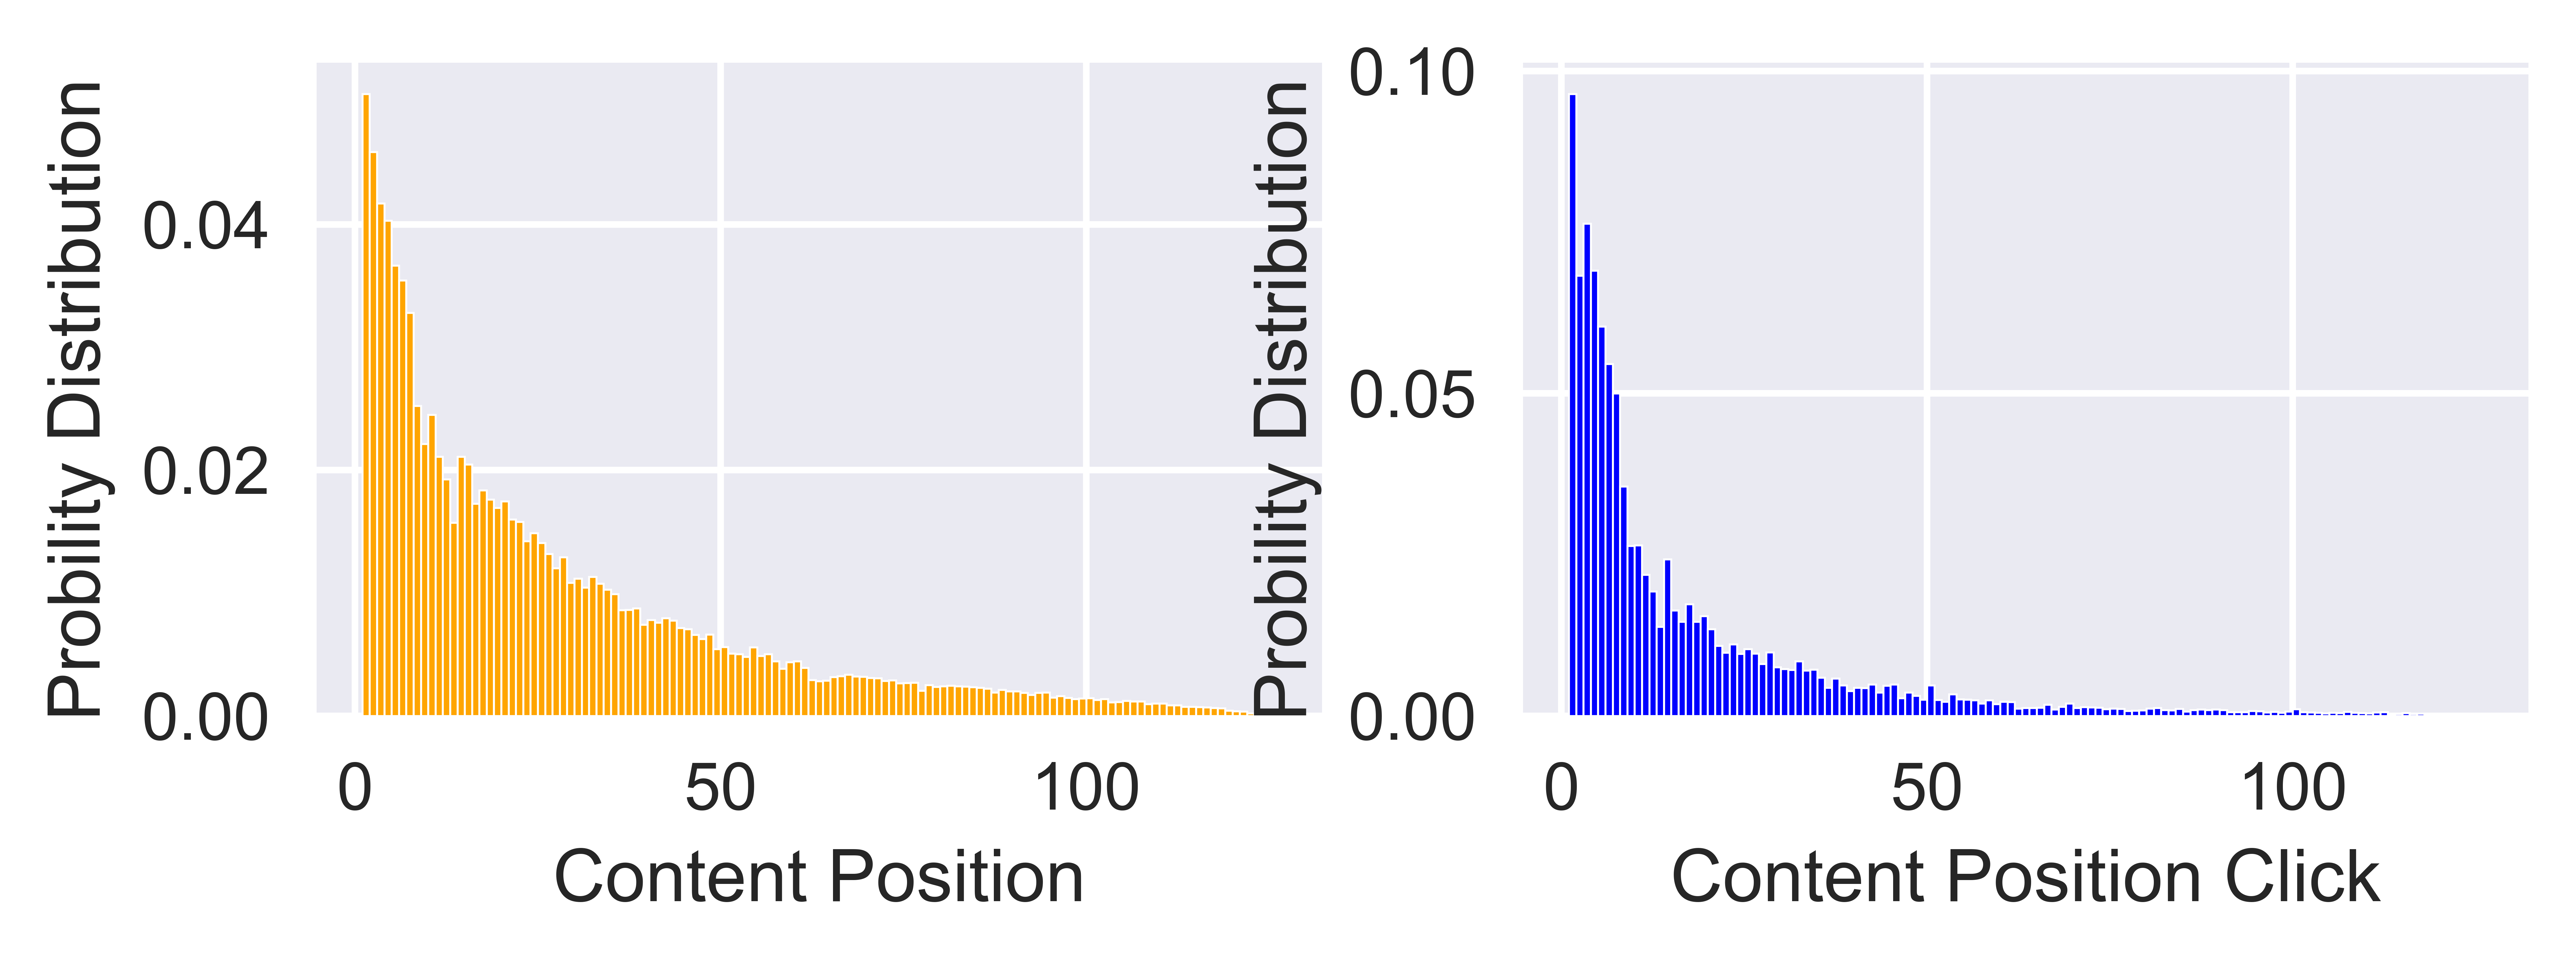

In [17]:
fig=plt.figure(dpi=1600)
alpha_level=0.6

ax1=fig.add_subplot(221)
aa= data['contentPosition']
plt.hist(aa,color='orange',normed=True,bins=range(1,127), edgecolor='white')
plt.xticks()
plt.xlabel('Content Position')
plt.ylabel('Probility Distribution ')


ax2=fig.add_subplot(222)
bb= click['contentPosition']
plt.hist(bb,color='blue',normed=True,bins=range(1,127), edgecolor='white')
plt.xticks()
plt.xlabel('Content Position Click')
plt.ylabel('Probility Distribution ')
plt.show()

In [18]:
c=[click.contentPosition.value_counts()]

# front page view avg

In [19]:
counts = pd.DataFrame(pd.Series(data.groupby(['frontPageViewId']).size(), name='num_count'))
print(counts[:10])

                                      num_count
frontPageViewId                                
00002d7e-c771-476f-8dc1-6f41aee45ecb          6
0000798d-c679-4408-bdb0-ad30b5bae5e2         13
00009654-52fd-4753-bdf0-20373320ad56         23
0000a99f-678c-4155-965b-233dd7ec7c16          8
0000e471-240d-404a-ae44-78f35e99abe5          4
0000ee86-8766-4935-80be-dc79209251d4         47
00011556-157a-4099-b5e3-b0ed44833324         43
0001282b-3036-4e1f-ab93-7c95e217d5e0          9
00013410-f5ff-4223-8c35-12a09c32ec40          7
000151d0-4c8f-4dd8-93ba-d64fe91d5e1d          2


In [20]:
train = data.frontPageViewId.unique()

In [24]:
train_max=df[df.frontPageViewId=='00013410-f5ff-4223-8c35-12a09c32ec40']
train_max_df=train_max.contentPosition.max()
train_max

,frontPageViewId,contentPosition,contentId,clickedPageViewId,IsClicked
157,00013410-f5ff-4223-8c35-12a09c32ec40,0,MyJ0r,missing,0
158,00013410-f5ff-4223-8c35-12a09c32ec40,1,dAxRJ,missing,0
159,00013410-f5ff-4223-8c35-12a09c32ec40,2,AKWV5,missing,0
160,00013410-f5ff-4223-8c35-12a09c32ec40,3,vRGmm,missing,0
161,00013410-f5ff-4223-8c35-12a09c32ec40,4,6Oy9e,missing,0
162,00013410-f5ff-4223-8c35-12a09c32ec40,5,K5PJ4,d8e2f6be-d7f0-4005-a82c-84541686b927,1
163,00013410-f5ff-4223-8c35-12a09c32ec40,6,4pxee,missing,0


In [ ]:
table = pd.DataFrame(columns=['frontpageviewid', 'max_position'])
for i in range(len(train)):
    frontpageviewid=train[i]
    train_max=df[df.frontPageViewId== frontpageviewid ]
    train_max_df=train_max.contentPosition.max()
    table.loc[i] = [frontpageviewid, train_max_df]


In [25]:
df[df.frontPageViewId=='00002d7e-c771-476f-8dc1-6f41aee45ecb']

,frontPageViewId,contentPosition,contentId,clickedPageViewId,IsClicked
4,00002d7e-c771-476f-8dc1-6f41aee45ecb,4,dAxRJ,missing,0
5,00002d7e-c771-476f-8dc1-6f41aee45ecb,5,QeOEW,missing,0
6,00002d7e-c771-476f-8dc1-6f41aee45ecb,6,K5PJ4,fe276cb0-e213-47f2-af05-2ec06cf8b61d,1
7,00002d7e-c771-476f-8dc1-6f41aee45ecb,7,4pxee,missing,0
8,00002d7e-c771-476f-8dc1-6f41aee45ecb,8,6Oy9e,missing,0
9,00002d7e-c771-476f-8dc1-6f41aee45ecb,9,3A58q,missing,0


# Q7 data with issue 
# mean/max of front page view id

In [26]:
df_issue=df.groupby('frontPageViewId').aggregate({'contentPosition': max, 'frontPageViewId': len})

In [28]:
df_issue_count=df_issue.contentPosition==df_issue.frontPageViewId-1

In [29]:
df_issue_count.value_counts()

True     267089
False    179677
dtype: int64

In [30]:
179677/446766

0.4021725019361366

# Q1 How far do the user scroll on the front-page? What is the average position and the 95% quantile a user reach? => where does personalisation have the biggest impact?

In [31]:
df_personalisation=df.groupby('frontPageViewId').aggregate({'contentPosition':len})
df_personalisation

,contentPosition
frontPageViewId,
00002d7e-c771-476f-8dc1-6f41aee45ecb,6
0000798d-c679-4408-bdb0-ad30b5bae5e2,13
00009654-52fd-4753-bdf0-20373320ad56,23
0000a99f-678c-4155-965b-233dd7ec7c16,8
0000e471-240d-404a-ae44-78f35e99abe5,4
0000ee86-8766-4935-80be-dc79209251d4,47
00011556-157a-4099-b5e3-b0ed44833324,43
0001282b-3036-4e1f-ab93-7c95e217d5e0,9
00013410-f5ff-4223-8c35-12a09c32ec40,7


In [32]:
df_personalisation.describe()

,contentPosition
count,446766.000000
mean,16.186379
std,19.629201
min,1.000000
25%,4.000000
50%,9.000000
75%,20.000000
max,115.000000


In [33]:
a=df_personalisation['contentPosition'].tolist()
np.percentile(a, 5)

1.0

In [34]:
np.percentile(a, 95)

60.0

In [35]:
df_personalisation.contentPosition.value_counts()

2      41282
3      34359
5      31888
1      30707
8      23252
7      21245
4      20411
6      19643
9      16589
11     15079
10     12185
14     10971
12     10429
13      9111
16      9066
15      6329
20      6312
17      6251
18      5644
19      5561
23      5335
22      4974
31      4315
21      4311
26      4192
25      3734
62      3688
28      3664
24      3636
34      3452
       ...  
87       309
86       306
84       305
97       304
78       304
85       302
80       299
88       288
75       287
81       278
82       278
79       275
77       275
91       274
90       265
89       253
95       245
107      233
83       219
104      218
110      210
93       205
108      168
111      166
101      141
105      129
103      123
102      104
113       19
115        2
Name: contentPosition, Length: 114, dtype: int64

In [37]:
fig=plt.figure(dpi=1600)
alpha_level=0.6

ax1=fig.add_subplot(111)
aa= df_personalisation['contentPosition']
plt.hist(aa,color='blue',normed=True,bins=range(1,116), edgecolor='white')
plt.xlabel('Content Position')
plt.ylabel('Probility Distribution ')
#ax1.set_xticks(np.arange(len(df_personalisation.contentPosition)))

# Q2 When users scroll down, are they as likely to click on the bottom articles?

In [38]:
click.head(20)

,frontPageViewId,contentPosition,contentId,clickedPageViewId,IsClicked
6,00002d7e-c771-476f-8dc1-6f41aee45ecb,6,K5PJ4,fe276cb0-e213-47f2-af05-2ec06cf8b61d,1
22,0000798d-c679-4408-bdb0-ad30b5bae5e2,30,1l8LQ,4302a2ef-6c02-4a37-85ea-d61ae1510df3,1
24,00009654-52fd-4753-bdf0-20373320ad56,1,AKWV5,4aec19d9-1104-4b28-b493-00135740dd4f,1
58,0000ee86-8766-4935-80be-dc79209251d4,0,knxxQ,ffe6052f-da9b-41ea-906c-3ccb081c26a3,1
142,00011556-157a-4099-b5e3-b0ed44833324,45,Oxq6b,1972522c-f1cd-4672-9d51-5b125a6605f0,1
162,00013410-f5ff-4223-8c35-12a09c32ec40,5,K5PJ4,d8e2f6be-d7f0-4005-a82c-84541686b927,1
174,00016b38-e78a-4d22-bf12-8f380be99bff,0,AKWV5,cda34dd9-2b55-4af2-b642-8046b6d9dfc6,1
179,00016e4c-8e5f-4a04-9a2b-4f3d90555ca3,1,Oxzrb,3238e305-272d-49ec-bbfc-de0b445df7ee,1
189,00021ea2-38ad-4d79-b282-5a7b61a5ccdd,2,rxO5w,3c6e21a3-a5c9-4748-bfdd-cd2dfcf2f22e,1
198,00021f6c-6e2e-46cf-9aab-fc09230c9f64,7,lPalk,3234e4ce-3d8b-42cb-bf71-9e05f838b094,1


In [40]:
#df_group=click["click"].groupby(df.frontPageViewId)
#click[click.contentPosition.max]
#dfrm.ix[dfrm['A'].idxmax()]
df1=df.groupby(['frontPageViewId'])['contentPosition'].transform(max) == df['contentPosition']
df_2=df[df1]
df_2.head(20)

,frontPageViewId,contentPosition,contentId,clickedPageViewId,IsClicked
3,missing,3,x6XzV,missing,0
9,00002d7e-c771-476f-8dc1-6f41aee45ecb,9,3A58q,missing,0
22,0000798d-c679-4408-bdb0-ad30b5bae5e2,30,1l8LQ,4302a2ef-6c02-4a37-85ea-d61ae1510df3,1
39,00009654-52fd-4753-bdf0-20373320ad56,25,5XRJm,missing,0
53,0000a99f-678c-4155-965b-233dd7ec7c16,7,4pxee,missing,0
57,0000e471-240d-404a-ae44-78f35e99abe5,3,K5PJ4,missing,0
100,0000ee86-8766-4935-80be-dc79209251d4,51,My9xo,missing,0
144,00011556-157a-4099-b5e3-b0ed44833324,47,84v4w,missing,0
156,0001282b-3036-4e1f-ab93-7c95e217d5e0,8,MyJ0r,missing,0
163,00013410-f5ff-4223-8c35-12a09c32ec40,6,4pxee,missing,0


In [41]:
imp_q2=df_2.contentId.count()

In [42]:
df_2.IsClicked.value_counts()

0    405532
1     43551
Name: IsClicked, dtype: int64

In [43]:
43551/449083

0.09697761883660704

# Q3 front page the same??

In [45]:
click_count=click.groupby('frontPageViewId').aggregate({'IsClicked':len})

In [46]:
click_count

,IsClicked
frontPageViewId,
00002d7e-c771-476f-8dc1-6f41aee45ecb,1
0000798d-c679-4408-bdb0-ad30b5bae5e2,1
00009654-52fd-4753-bdf0-20373320ad56,1
0000ee86-8766-4935-80be-dc79209251d4,1
00011556-157a-4099-b5e3-b0ed44833324,1
00013410-f5ff-4223-8c35-12a09c32ec40,1
00016b38-e78a-4d22-bf12-8f380be99bff,1
00016e4c-8e5f-4a04-9a2b-4f3d90555ca3,1
00021ea2-38ad-4d79-b282-5a7b61a5ccdd,1


In [47]:
click_count.apply(pd.value_counts)

,IsClicked
1,175434
2,3646
3,1137
4,503
5,235
6,102
7,54
8,33
9,25
10,13
